In [1]:
# Instalacion de un ambiente latex para documentacion cientifica

## Requisitos (estos comandos desde una consola)
#* conda create -n py27 python=2.7 ipykernel
#* conda create -n py35 python=3.5 ipykernel

### Kernel Python 2.7 para notebook Jupyter
#* conda create -n py27 python=2.7
#* source activate py27
#* conda install notebook ipykernel
#* ipython kernel install --user

### Kernel Python 3.5 para notebook Jupyter
#* conda create -n py35 python=3.5
#* source activate py35
#* conda install notebook ipykernel
#* ipython kernel install --user

## Instalación de ambiente latex para Jupyter Notebook

### Instalación
#* jupyter nbextension install https://rawgit.com/jfbercher/latex_envs/master/latex_envs.zip  --user

### Activación de ambiente latex para notebooks
#* jupyter nbextension enable latex_envs/latex_envs    

### Verificar que el ambiente esta disponible
# from notebook.nbextensions import check_nbextension
# check_nbextension('latex_envs', user=True)
#
#check_nbextension('codefolding', user=True)
#check_nbextension('codefolding/main.js', user=True)


# Otras utilidades
# conda install -c conda-forge jupyter_nbextensions_configurator
# https://github.com/Jupyter-contrib/jupyter_nbextensions_configurator
# https://github.com/ipython-contrib/jupyter_contrib_nbextensions/blob/master/README.md

# Referencias
#* https://rawgit.com/jfbercher/latex_envs/master/doc/latex_env_doc.html  (Guia esta oara Ipython)
#* http://mindtrove.info/4-ways-to-extend-jupyter-notebook/              (Como hacerlo funcionar en jupyter)
#* https://janschulz.github.io/
#* http://web.stanford.edu/class/math53/schedule.html
#* https://github.com/Jupyter-contrib/jupyter_nbextensions_configurator


In [2]:
# Algunas paginas con ejemplos utiles

# https://rawgit.com/jfbercher/latex_envs/master/doc/latex_env_doc.html
# http://stackoverflow.com/questions/13208286/how-to-write-latex-in-ipython-notebook

# http://hplgit.github.io/doconce/doc/pub/slides/scientific_writing-1.html
# http://hplgit.github.io/teamods/writing_reports/index.html
# https://github.com/hplgit/hplgit.github.com/tree/master/teamods/writing_reports/report_generation

In [3]:
# How to hide code from cells in ipython notebook visualized with nbviewer?
# http://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer

#from IPython.display import HTML

#HTML('''<script>
#code_show=true; 
#function code_toggle() {
# if (code_show){
# $('div.input').hide();
# } else {
# $('div.input').show();
# }
# code_show = !code_show
#} 
#$( document ).ready(code_toggle);
#</script>
#<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
!pwd

/home/zenbook/Escritorio/repo/paper


In [5]:
# funcionalidades 
bShowInline = False  # Set = False for document generation


from IPython.display import display, Math, Latex, Image
def makeplot( plt, figname, figcaption):
    plt.savefig(figname)

    #if bShowInline:
        #plt.show()
    #else:
    #    plt.close()

    strLatex="""
    \\begin{figure}[b]
    \\centering
        \\includegraphics{%s}
        \\caption{%s}
        \\label{fig:%s}
    \\end{figure}"""%(figname, figcaption, figname) 
    #return Latex(strLatex) 

class Caption():
    def __init__(self, fig, ref, cap):
        self.cap = cap
        self.fig = fig
        self.ref = ref
    def _repr_html_(self):
        return '<center>{0}</center>'.format(self.cap)
    def _repr_latex_(self):
        #return '\\begin{figure}\n \includegraphics{'+self.fig+'}\n \caption{'+self.s+'}\n\\end{figure}'
        a = """\\begin{figure}
                \centering
                \includegraphics{%s}
                \caption{Figura \\ref{fig:%s} %s}
                \label{fig:%s}
                \end{figure}"""%(self.fig, self.ref, self.cap, self.ref)
        return a
    

plot_file = 'ubicacion'+'.png'

#a = Graficar_Prom(avg_Lea, avg_Sol, title, plot_file)
#a = plot_rcsvs(rc, svs, titles, plot_file, figsize=(15,5))
#makeplot(a, plot_file, plot_caption)
#display(Image(plot_file),Caption(plot_file, 'UbiSats', 'Ubicacion de los receptores y satelites'))

# Con Markdown 
# ![Hola]( {{plot_title}} )

In [6]:
# Instalando Python markdown
# source activate py27
# conda install markdown
#x = 10

# EN UNA CELDA MARKDOWN PUEDO LLAMAR LA EXPRESION 
#-> {{x}}

\title{Conceptos y planteamientos para receptores GNSS inmersos en ambientes urbanos
}

# Introducción

Los sistemas de posicionamiento satélital fueron concebidos desde sus inicios como una herramienta para llevar a cabo posicionamiento de precisión sobre la superficie terreste. Por esta razón la importancia de modelar y describir de la mejor forma posible los fenómenos involucrados en el funcionamiento de los sistemas de posicionamiento satelital, para mitigar los efectos de distorcion y ruido que afectan las señales satélitales induciendo errores en la medición de posicionamiento.\newline

**Esta sección del documento trata un escenario de posicionamiento en dos dimensiones (2D), para dar una introducción a las tareas de posicionamiento en sistemas satelitales, y dar luces de la importancia y dificultad para alcanzar precisión en este tipo de sistemas.**\newline

**Adicionalmente los resultados del trabajo preliminar presentado en ésta sección, argumentan el por qué del intéres por investigar y plantear una técnica de posicionamiento para contribuir a la mejora del nivel de precisión en dispositivos GNSS**.\newline

## La trilateración

Los Conceptos de trilateracion y multilateración son la base fundamental de los actuales algoritmos de posicionamiento GPS. Este concepto se apoya en la formulación del lugar geométrico del receptor a partir de la ubicación exacta de los satélites. Desde el enfoque geométrico, el calcular la posición del receptor requiere de un determinado número de ecuaciones cuadráticas que resolver, como se vio anteriormente.\newline

Aunque la determinación exacta de la posición del receptor puede ser posible desde el punto de vista geométrico,  con la formulación apropiada del sistema de ecuaciones no lineales. Las determinación exacta del Rango entre el satélite y el receptor es prácticamente imposible en la vida real, debido a factores externos como fenómenos de dispersión ionosférica, ruido, errores de sincronización de reloj, efecto multipath entre otros.\newline

Como se presentará en las siguientes secciones, la linearización del sistema de ecuaciones que describe el problema de posicionamiento que involucra a un receptor y múltiples satélites, permite estimar la posición del receptor mediante un proceso iterativo en el cual el receptor esta en capacidad de obtener observables de cada satélite.\newline

Sin embargo, para requerimientos de mayor precisión el plantemiento de linearización requiere tomar en consideración las fuentes de error que afectan la medición del observable, demandando una mayor complejidad en el planteamiento matemático y computacional del algoritmo de posicionamiento.\newline

Por ello, se considera importante apoyar la tarea de posicionamiento en los conceptos de lugar geométrico de las pseudo-distancias, para comprender el impacto que tiene la presencia de ruido y fenómenos de dispersición en las medidas del receptor, para así proponer mecánismos que permitan mejorar la precisión posicionamiento en condiciones reales dentro de cañones urbanos.\newline

# Marco Teórico

En esta sección se introducen un conjunto de conceptos relacionados con el problema de posicionamiento basado en sistemas de posicionamiento satélital, con el proposito de tener un marco de referencia común para el lector, a partir del cual se desglosa el planteamiento de la idea y el desarrollo propuesto en este trabajo.

## Sistema global de posicionamiento satelital - GNSS



El sistema de posicionamiento global (GPS), es el primer sistema global de navegación satelital GNSS. GPS consta de una constelación de 24 satélites sobre la órbita media de la tierra que trasmite continuamente señales de radio frecuencia hacia la tierra, permitiendo así que los dispositivos de posicionamiento puedan determinar su posición sobre la superficie terrestre.\newline 

La idea detrás de los sistemas de posicionamiento tales como GPS, puede resumirse en que:

> Si la distancia desde tres satélites en el espacio a un punto en común sobre la superficie de la tierra(un receptor GPS) es conocida, junto con la posición de los satélites al momento de la transmisión, la posición del receptor puede ser determinada gracias a la aplicación de conceptos trigonométricos, álgebra y un sistema de coordenadas apropiado.[1].

Sin embargo, la problemática es ¿Como conseguir las distancias a cada satélite de forma precisa, para poder aumentar la precisión al momento de determinar la posición del receptor sobre la superficie de la tierra.?

Para ello, se requiere comprender el funcionamiento generalizado de los sistemas de posicionamiento y la forma en como se puede representar la distancia entre el satélite y el receptor a partir de modelos de observacionales. 

## El funcionamiento de GPS

Para efectos prácticos se describe el funcionamiento del sistema de posicionamiento satelital (GPS), con el propósito de introducir el concepto de trilateración.\newline

GPS funciona gracias a la transmisión continua de señales de radiofrecuencia a través de la ionósfera y la tropósfera. Las señales transmitidas están conformadas por dos señales de portadora, dos códigos y un mensaje de navegación (detalles acerca del satélite). Estas señales son adquiridas gracias a una antena especialmente diseñada para captar las señales en el rango de frecuencias específico en que transmiten los satélites GPS (1227.60 y 1575.42 MHz).\newline

Para determinar la posición de un receptor sobre la superficie terrestre GPS se apoya en el concepto denominado trilateración. La trilateración hace referencia al método de posicionamiento mediante el cual, se toma como referencia las coordenadas de los satélites y la distancia a cada uno de ellos para determinar la posición del receptor.\newline

Considerando que las coordenadas de cada satélite son enviadas como un mensaje binario que viaja sobre la señal satélital que llega al receptor, tan solo se requiere encontrar la forma de representar la distancia entre el satélite y el receptor a partir de modelos de observacionales.

\subsection{Modelo de observación}

El concepto de trilateración está apoyado en la obtención de medidas de distancias a partir del tiempo de vuelo (TOF) de la señal a través de un medio de trasmisión. A partir de está concepción, se define que el modelo del observable de pseudo-distancia (pseudo-rango) como:\newline

\begin{equation}
  P_{r}^{s} = (T_r - T_s)*c
  \label{modelo Observables}
\end{equation}

Donde $T_r$ es un tiempo conocido por el usuario al momento de la recepción, $T_s$ el tiempo de envío de la señal desde el satélite, que puede ser obtenido a partir de un mensaje de navegación y $c$ es el valor de la velocidad de la luz en el vacío.\newline 

Considerando que los errores del receptor y el satélite no son completamente precisos, se debe considerar un desfase del reloj $\tau_r$ y $\tau_s$, con respecto de los tiempos verdaderos de envío y recepción $t_r$ y $t_s$ respectivamente.\newline

\begin{equation}
\begin{aligned}
  T_r  = t_r - \tau_r\\
  T_s  = t_s - \tau_s
 \end{aligned}
 %\caption{\ref{sincronizacion} Relojes imperfectos en el receptor y satelite}
 \label{sincronizacion}
\end{equation}

De forma que al operar la ecuacioń \ref{modelo Observables}, bajo la consideración anterior se obtiene que:

\begin{equation*}
    \begin{aligned}
    P_{r}^{s} & = ((t_r - \tau_r) - (t_s - \tau_s))*c\\
              & = (t_r - t_s)*c + (\tau_r - \tau_s)*c\\
              & = (TOF)*c + (\tau_r - \tau_s)*c\\
              & = \rho^{s}(t_r, t_s) + (\tau_r - \tau_s)*c\\
  \label{pseudo-distancia}
 \end{aligned}
\end{equation*}


Donde $\rho^{s}(t_r, t_s)$, representa la distancia entre el satélite y el receptor, basado en el TOF de la señal a través de la atmósfera. 

Para efectos demostrativos de esta sección, el escenario de posicionamiento sera considerado en dos dimensiones (2D). Adicionalmente se asume que la velocidad de la luz a través de la atmósfera es igual a la velocidad en el vacío y que no se tiene efecto de ruido en la señal al momento de la recepción.\newline

Producto de las anteriores consideraciones el modelo puede relacionar, la distancia geométrica $\rho_r^{s}$ entre el satélite y el receptor con la psuedo-distancia $\rho^{s}(t_r, t_s)$ de la siguiente manera:\newline

\begin{equation*}
    \begin{aligned}
    \rho^{s}(t_r, t_s) = \rho_r^{s}
    \label{rel distancia geome psuedo distancia}
 \end{aligned}
\end{equation*}

Donde $\rho_r^{s}$, representa la distancia geométrica entre el satélite y el receptor, es decir:

$$\rho_r^{s} = \sqrt{(x_{r} - x_{s})^{2}, (y_{r} - y_{s})^{2}}$$

Teniendo en cuenta que la expresión anterior las coordenadas del satélite $(x_s, y_s)$ son conocidas de los datos de efemerides de la señal satelital, y que la relación entre el TOF y la pseudodistancia es el valor del observable obtenido por el receptor $P_r^{s}$ y que obedece a la expresión \ref{modelo Observables}, quedando como incógnitas las coordenadas del receptor.\newline

Para tal efecto , un conjunto de 3 satélites serían suficientes para determinar las coordenadas $(x_r, y_r)$ del receptor en el instante de tiempo $t$.\newline

\begin{equation*}
    \begin{aligned}
    P_{r}^{S_1} & = \rho_r^{S_1} + (\tau_r - \tau_{S_1})*c\\
    P_{r}^{S_2} & = \rho_r^{S_2} + (\tau_r - \tau_{S_2})*c\\
    P_{r}^{S_3} & = \rho_r^{S_3} + (\tau_r - \tau_{S_3})*c\\
    \label{Observable 3 satelites}
 \end{aligned}
\end{equation*}

De este conjunto de ecuaciones $(x_s, y_s)$ son términos desconocidos. Mientras que las coordenadas $(x_s, y_s)$ de cada satélite pueden ser calculadas a partir del mensaje de navegación GPS, al igual que el término de tiempo ($\tau_s$) para compensar la desviación del reloj al momento del envío de la señal desde un determinado satélite, como se presentó en el conjunto de ecuaciones ~\ref{sincronizacion}.\newline

Adicionalmente, se puede decir que éste sistema de ecuaciones tiene las características en sistema determinado (igual número de incógnitas y ecuaciones). Sin embargo, un receptor hoy día tiene la posibilidad de visualizar en promedio 12 satélites en un recorrido a cielo abierto, lo que convertiría el sistema de ecuaciones anterior en un sistema sobre-determinado es decir, pasaría a tener un total de 12 ecuaciones para resolver un total de 3 incógnitas ($(x_s, y_s)$ en un instante $t$).\\

\begin{equation*}
    \begin{aligned}
    P_{r}^{S_1} & = &\rho_r^{S_1}& + &(\tau_r - \tau_{S_1})*c&\\
    P_{r}^{S_2} & = &\rho_r^{S_2}& + &(\tau_r - \tau_{S_2})*c&\\
    & \vdots & \vdots & & \vdots & & \\[-8pt] \\% \ddots \\\& \vdots  
    P_{r}^{S_n} & = &\rho_r^{S_n}& + &(\tau_r - \tau_{S_n})*c&\\
    \label{Observable n satelites}
 \end{aligned}
\end{equation*}

\subsection{Métodos de solución lineales}

Con el propósito de resolver el sistema de ecuaciones sobre-determinado, se plantea un proceso de linearización para el conjunto de ecuaciones, para posteriormente ser empleado en el método de mínimos cuadrados.\newline

Para tal efecto, se cosidera que el observable de pseudo-rango esta compuesto por un término que representa la distancia geométrica al satélite y un término de error. Adicionalmente, el observable de medición se asume libre de errores de sincronización de reloj.\newline

De forma que el sistema de ecuaciones obedece a las siguientes expresiones:\newline

\begin{equation}
    \begin{aligned}
        P_{obs} & = P_{model} + ruido \\
                & = P(x, y, z, \tau) + \eta
        \label{modelo minimos cuadrados}
    \end{aligned}
\end{equation}

Al desarrollar la expansión en series de Taylor para el término $P_{model}$ alrededor de un punto de operación $r_o$ = ($x_o$, $y_o$, $z_o$, $\tau_o$), se tiene:\newline

\begin{equation*}
    \begin{aligned}
        P(x, y, z, \tau) & \approx P(x_o, y_o, z_o, \tau_o) + (x - x_o)\d{P}{x}  \\
                         & \qquad  + (y - y_o)\d{P}{y} + (z - z_o)\d{P}{z} + (\tau - \tau_o)\d{P}{\tau}  \\
                         & \approx P(x_o, y_o, z_o, \tau_o) + (\Delta{x_o})*\d{P}{x} \\ 
                         & \qquad  + (\Delta{y_o})*\d{P}{y} + (\Delta{z_o})*\d{P}{z} + (\Delta{\tau_o})*\d{P}{\tau}        
        \label{modelo minimos cuadrados}
    \end{aligned}
\end{equation*}

Esta ecuación a menudo es escrita como:

\begin{equation}
    \mathbf{b  = Ax + \eta}
    \label{nomenclatura matricial}
\end{equation}

Considerando el caso en el que un receptor obtiene observables desde $m$ satélites para determinar sus coordenadas $x, y, z$ en el instante $t$, el sistema de ecuaciones presentado en la ecuación \ref{nomenclatura matricial} es un sistema matricial sobre-determinado, debido a que $ m > n $.\newline


## Métodos de Optimización

Retomando el planteamiento para un caso 2D, se concluía que era posible determinar la posición exacta de un receptor con tan sólo conocer la distancia a tres satélites. De los cuales, los pseudo-rangos a dos satélites determinan la intersección de dos circunferencias y una tercera medición, resuelve cuál de las dos intersecciones corresponde a la posición exacta de un receptor en el instante $t$, como se representa en la figura \ref{fig:LOP}\newline

\begin{figure}[htp]
    \centering
    \includegraphics{Figs/LOP.png}
    \caption{Figura \ref{fig:LOP} LOP}
    \label{fig:LOP}
\end{figure}

Sin embargo para el método de solución presentado en la sección, se plantea un proceso de linealización para el termino de la distancia geometrica existente entre el receptor y cada uno de los satélites.\newline

A diferencia del el enfoque anterior, se introduce en esta sección el planteamiento del problema de posicionamiento como un problema de optimización, que permite el acoplamiento de modelos matemáticos variados al modelo observacional, con el propósito de poder representar la naturaleza propia de cada uno de los fenómenos asociados a las fuentes de error típicas del problema de  posicionamiento GNSS; los cuales no necesariamente podrían ser descritos bajo un comportamiento lineal. Como puede ser el caso de los modelos matemáticos que describen el comportamiento de la ionosféra y/o troposféra y modelos probabilísticos para representación o mitigación del efecto multipath.\newline

Para propósitos prácticos, en éste plateamineto se considera que la medición obtenida desde los satélites al receptor están bajo la presencia del mismo nivel de ruido, de forma que las ecuaciones que describen el escenario 2D, son:.

\begin{equation}
\begin{aligned}
    P_{A}^{s_1} &= \rho_A^{s_1} + \epsilon_A^{s_1} \\
    P_{A}^{s_2} &= \rho_A^{s_2} + \epsilon_A^{s_2} \\
    P_{A}^{s_3} &= \rho_A^{s_3} + \epsilon_A^{s_3} \\
    \label{Enfoque Optimizacion1}
\end{aligned}
\end{equation}

                        
\noindent Donde:

\begin{itemize}
    \item $P_{r}^{sat}$: es el valor del observable de pseudorango obtenido en receptor.
    \item $\rho_r^{sat}$: corresponde a la distancia geométrica entre el satélite \textit{s} y el receptor \textit{r}. \hspace{4cm} (ej: $\rho_A^{sat} = \sqrt{(x_{A} - x_{sat})^{2}, (y_{A} - y_{sat})^{2}}$).
    \item $\epsilon_r^{sat}$: representa las diferentes fuentes de error que pueden afectar la medida del pseudo-rango, efecto ionosférico, troposférico, sincronización y errores aún sin modelar. (ej: $\epsilon_r^{sat} = c*(\tau_r - \tau_sat) + I_r^{sat} + T_r + \eta_r^{sat}$)
\end{itemize}

Entonces el planteamiento del problema de optimización para la tarea de posicionamiento, parte del hecho de tomar el sistema de ecuaciones no lineal presentado en \ref{Enfoque Optimizacion1}, para construir una función objetivo que posteriormente puede ser minimizada.

\begin{equation}
\begin{aligned}
    f_1 &= P_{A}^{s_1} - (\rho_A^{s_1} + \epsilon_A^{s_1}) \\
    f_2 &= P_{A}^{s_2} - (\rho_A^{s_2} + \epsilon_A^{s_2}) \\
    f_3 &= P_{A}^{s_3} - (\rho_A^{s_3} + \epsilon_A^{s_3}) \\
    \label{Enfoque Optimizacion2}
\end{aligned}
\end{equation}

Al retomar el conjunto de funciones no lineales conformadas del sistema de ecuaciones \ref{Enfoque Optimizacion1}, para expresar la función objetivo como:

\begin{equation}
\begin{aligned}
    f_{obj} = \sqrt{f_1^{2} + f_2^{2} + f_3^{2}}
    \label{Enfoque Optimizacion3}
\end{aligned}
\end{equation}

Dado que el propósito de este trabajo es plantear una solución de posicionamiento que permita mejorar el nivel de precisión en el posicionamiento de dispositivos inmersos en ambientes urbanos, la función objetivo anterior debe ser reformulada tomando en cuenta el escenario de interracción entre los dos dipositivos, tomando ventaja del intercambio de información para contribuir a la disminución  del nivel de error en el posicionamiento.

Para ello se toma con condiciones


De forma que el sistema de ecuaciones que describe los observables a 3 satelites en común para dos receptores en interacción sería:

\begin{equation*}
\begin{aligned}
    f_1 &= P_{A}^{s_1} - (\rho_A^{s_1} + \epsilon_A^{s_1}) \\
    f_2 &= P_{B}^{s_1} - (\rho_B^{s_1} + \epsilon_B^{s_1}) \\
    f_3 &= P_{A}^{s_2} - (\rho_A^{s_2} + \epsilon_A^{s_2}) \\
    f_4 &= P_{B}^{s_2} - (\rho_B^{s_2} + \epsilon_B^{s_2}) \\
    f_5 &= P_{A}^{s_3} - (\rho_A^{s_3} + \epsilon_A^{s_3}) \\
    f_6 &= P_{B}^{s_3} - (\rho_B^{s_3} + \epsilon_B^{s_3}) \\
    \label{Enfoque Optimizacion2}
\end{aligned}
\end{equation*}





el conjunto de ecuaciones que describe los observables de cada receptor


la imagen del plano con la distancia y teta



Asumiendo que los dos receptores en cuestión estan dispuestos sobre la superficie terrestre

# La propuesta

\cite{lehner2005novel} El objetivo de esta investigación es contribuir a mejorar en el posicionamiento de dispositivos GNSS inmersos dentro de un ambiente urbano.\newline

Para ello, se enfoca en dos ejes:\newline

* La concepción de un modelo de interacción entre los dispositivos.
* Un planteamiento matemático que acoja la interacción entre los dispositivos.

## La interacción

Tomando como punto de partida que la propuesta de esta investigación apuesta por la posibilidad de mejorar el posicionamiento de dos dispositivos GNSS mediante la interacción e intercambio de infomación entre ellos.\newline

## Planteamiento Matemático

El modelo matemático a considerar, toma como punto de partida los observables de receptores de bajo costo con capacidad para obtener observables en la banda de frecuencia L1. \newline

Adicionalmente, se tiene en cuenta el escenario en el cual dos dispositivos cuentan con un medio para el intercambio de información, que será útil para un algortimo que busca reducir el error de posicionamiento en uno de los dos dispositivos involucrados en el escenario.\newline

\begin{figure}
    \centering
    \includegraphics{Figs/rango_satelites.pdf}
    \caption{Figura \ref{fig:2RX1sat} escenario 2 receptores 1 sat}
    \label{fig:2RX1sat}
\end{figure}

Del escenario presentado en la figura \ref{fig:escenario 2 receptores 1 sat} se puede decir que:

\begin{equation}
    \begin{aligned}
        d &= \vec{h_A}^{s} - \vec{h_B}^{s}
    \end{aligned}
    \label{relaciones geometricas1}
\end{equation}

\begin{equation}
    \begin{aligned}
        {e}^{s} = \frac{\vec{h_A}^{s} - \vec{d}/2}{\vec{h_A}^{s} - \vec{d}/2} =
        \frac{ \vec{h_A}^{s} + \vec{h_B}^{s}}{\lVert 2{\vec{h_A}}^{s} - \vec{d}\rVert},
        %\vec{d} \cdot {e}^{s} & = (\vec{h_A}^{s} - \vec{h_B}^{s}) \cdot 
        %\frac{ \vec{h_A}^{s} + \vec{h_B}^{s}}{\lVert 2{\vec{h_A}}^{s} - \vec{d}\rVert} \\
    \end{aligned}
    \label{relaciones geometricas2}
\end{equation}

\noindent Donde:

\begin{itemize}
    \item[$\vec{h_A}^{s}$:]  Vector desde el receptor (A) hacia el satélite (S).
    \item[$\vec{h_B}^{s}$:]  Vector desde el receptor (B) hacia el satélite (S).
    \item[${e}^{s}$:]        Vector unitario desde punto medio en $d$ hacia el satélite (S).
    \item[$\rho_a$:] Distancia entre receptor (A) y el satélite (S), expresado en longitudes de onda.
    \item[$\rho_b$:] Distancia entre receptor (b) y el satélite (S), expresado en longitudes de onda.
    \item[$\lambda$:] Longitudes de onda (para una señal de portadora en la frecuencia L1 $\approx$ 19 cm)
\end{itemize}

Entonces operando las expresiones \ref{relaciones geometricas1} y \ref{relaciones geometricas2}, se puede obtener una relación que expresa el producto entre los vectores  $\vec{d}$ y ${e}^{s}$ como una relación proporcional a la diferencia de los observables $\rho_a$ y $\rho_b$.\newline

\begin{equation*}
    \begin{aligned}
        \lVert 2{\vec{h_A}}^{s} - \vec{h_B}^{s}\rVert \cdot {e}^{s} 
        & =
        \lVert \vec{h_A}^{s} \rVert^{2} - \lVert \vec{h_B}^{s} \rVert^{2} \\
        & = (\lVert \vec{h_A}^{s} \rVert - \lVert \vec{h_B}^{s}\rVert) 
            \cdot 
            (\lVert \vec{h_A}^{s} \rVert + \lVert \vec{h_B}^{s}\rVert) \\
        & = \lambda (\rho_a - \rho_b)(\lVert \vec{h_A}^{s} \rVert + \lVert \vec{h_A}^{s} - \vec{d}\rVert) & \\
    \end{aligned}
  \label{Geometria 2 receptores 1 sat}
\end{equation*}

\noindent Obteniendo:

\begin{equation}
    \begin{aligned}
        \omega^{s} = &  \frac{ \lVert 2{\vec{h_A}}^{s} - \vec{d}\rVert }
                {\lVert \vec{h_A}^{s} \rVert + \lVert \vec{h_A}^{s} - \vec{d}\rVert}
    \end{aligned}
  \label{Geometria 2 receptores 1 sat}
\end{equation}

\begin{equation}
    \begin{aligned}
        \omega^{s} \cdot {e}^{s}  = &  \frac{ 2{\vec{h_A}}^{s} - \vec{d}}
                {\lVert \vec{h_A}^{s} \rVert + \lVert \vec{h_A}^{s} - \vec{d}\rVert}
    \end{aligned}
  \label{Geometria2}
\end{equation}

De esta expresión se puede esperar que el término $\omega^{s}$ este muy cercano a cero, cuando los satélites se encuentran sobre el zenith del punto medio de la distancia que separa los receptores (formando así un triangulo isosceles). Sin embargo difícilmente los satélites pueden alcanzar ésta ubicación, por ende no se puede asumir esta condición.\newline

Por lo que trabajar con la relación presentada en la derecha de la ecuación \ref{Geometria2}, puede ser más indicada para poder determinar con precisión el vector distancia que separa los receptores en función de los observables $\rho_a$ y $\rho_b$.\newline

Aunque la distancia $\lVert d \rVert$ no necesariamente puede ser conocida, el vector $\vec{d}$ puede ser estimado por medio de un proceso iterativo.

# Escenario de Simulación 2D

%## Funciones utilitarias

In [7]:
import numpy as np
from numpy.linalg import norm,pinv,inv
from scipy.linalg import qr
from scipy.stats import chi2,ncx2
import scipy
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

# space vehicles limits
SV_MIN = np.array([0, 20000000-10000])
SV_MAX = np.array([1200000, 20000000+10000])

# receiver limits
RC_MIN = np.array([200000, 0])
RC_MAX = np.array([1000000, 2500])

def new_rcs(n=1):
    return np.random.uniform(RC_MIN, RC_MAX, (n, 2))

def new_svs(n=1):
    return np.random.uniform(SV_MIN, SV_MAX, (n, 2))

def get_distances(rc, svs):
    return np.linalg.norm(rc-svs, axis=1)

def get_pseudoranges(rc, svs, svs_bias=0., svs_noise=1e-30):
    if type(svs_bias)!=np.array and type(svs_bias)!=list:
        svs_bias = np.ones(len(svs))*svs_bias
    if type(svs_noise)!=np.array and type(svs_noise)!=list:
        svs_noise = np.ones(len(svs))*svs_noise

    ds = get_distances(rc, svs)
    measurement_error = np.zeros(ds.shape)
    
    for i, sv in enumerate(svs):
        me = np.random.normal(loc=svs_bias[i], scale=svs_noise[i]) 
        ds[i] += me
        measurement_error[i] = me
    return ds, measurement_error

def least_squares_position(svs, prs, max_iters=100):
    ri = new_rcs()[0]
    for i in range(max_iters):
        p_computed = get_distances(ri, svs)
        b = prs - p_computed
        A = (ri-svs)/p_computed[:,None]
        dx = np.linalg.pinv(A.T.dot(A)).dot(A.T).dot(b)
        ri += dx
        if np.linalg.norm(dx)<1e-8:
            break
    return ri,A,b,dx

def plot_rcsvs(rc, svs, axes_titles, filename, figsize=None):
    if figsize!=None:
        plt.figure(figsize=figsize)
    plt.scatter(svs[:,0], svs[:,1], label="satellites")
    for i in range(len(svs)):
        plt.text(svs[i,0], svs[i,1], "PRN "+str(i))
        
    plt.scatter(rc[0], rc[1], color="red", label="receiver")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.xlabel("Distancia sobre el eje x [m]", size=12)
    #plt.ylabel("Altura de los satelites [m]", size=12)
    
    plt.xlabel(axes_titles[0], size=12)
    plt.ylabel(axes_titles[1], size=12)
    
    # AJUSTE DEL TITULO EN PLT FIGURE
    # http://stackoverflow.com/questions/25036699/how-to-increase-plt-title-font-size-python
    plt.figtext(.5, 1, axes_titles[2],fontsize=16,ha='center')
    plt.xlim([0,1.5e6])
    
    # Calling pylab.savefig without display in ipython
    # http://stackoverflow.com/questions/15713279/calling-pylab-savefig-without-display-in-ipython
    plt.savefig(filename)
    plt.close()
    
    return plt

%### empaquetar información de los satélites

In [8]:
def get_RxInfo(rc, svs):
    
    # colapsar 2 diccionarios en 1
    def merge(d1, d2, merge):
        result = dict(d1)
        for k,v in d2.iteritems():
            if k in result:
                result[k] = merge(result[k], v)
            else:
                result[k] = v
        return result

    P1 = {}   # pseudorango desde cada receptor a cada satelite
    P1n = {}   # pseudorango ruidoso desde cada receptor a cada satelite
    P1ne = {}   # pseudorango ruidoso desde cada receptor a cada satelite

    for (i, rx) in enumerate(rc):
        P1[i] = get_distances(rx, svs)
        #P1n[i], P1ne[i]= get_pseudoranges(rx, svs, svs_noise=1.)
        P1n[i], P1ne[i]= get_pseudoranges(rx, svs)

    #print P1
    #print P1n

    def get_SatInfo(rxid, svs, P1n):
        Satpos = {}
        Satran1 = {}
        for (satid, s) in enumerate(svs):
            Satran1[satid] = P1n[rxid][satid]
            #Satran2[satid] = P1n[1][satid]
            Satpos[satid] = [svs[satid][0], svs[satid][1]]  
        return merge(Satran1, Satpos, lambda x, y:(x,y))

    # Diccionarios para la info de satelites
    Sat_Info = {}

    for (i, rx) in enumerate(rc):
        Sat_Info[i] = get_SatInfo(i, svs, P1n)
        
    return Sat_Info, P1n, P1ne



%## Mis Funciones Auxiliares

In [9]:
def Imprime_Dic(Diccionario):
    # Recorrer un diccionario, imprimiendo su clave-valor
    for key, val in Diccionario.items():
        print "%s -> %s" %(key, val)

def Clear_Data(bug, Data_Dic):
    #print " Antes de limpiar"
    #Imprime_Dic(e_Esti)
    for key, val in bug.items():
        if val==1: 
            #print "Dato Malo"
            del Data_Dic[key]
            #print "%s -> %s" %(key, val)
        #else:
        #    print "%s -> %s" %(Data_Dic[key], val)
        
    #print " Después de limpiar"
    #Imprime_Dic(e_Esti)
    return Data_Dic

# 2D y 3D scatter plots with legends
# http://stackoverflow.com/questions/17411940/matplotlib-scatter-plot-legend
# http://astrolitterbox.blogspot.com.co/2012/08/decent-scientific-plots-with-matplotlib.html


%## Funciones para las pruebas

In [10]:
def Pruebas(runs, num_Sats, bias_noise, print_info):
    c = 0.
    
    RXs = {}
    SVs = {}
    
    RX_Least = {}
    e_Least = {}
        
    RX_Solver = {}
    e_Solver = {}
    
    Bugs = {}
    
    if (print_info == 1):
        print "Exper \t Bug \t e_Least[Rx1] e_solver[Rx1] \t e_Least[Rx2] e_solver[Rx2]"
    
    for r in range(runs):
        bug = 1
        rc = new_rcs(2)              # El numero de receptores maximo es fijo para esta investigación
        svs = new_svs(num_Sats)

        RXs[r] = rc
        SVs[r] = svs

        Sat_Info, P1n, P1ne = get_RxInfo(rc, svs)

        prs = {}
        me = {}
        rc_es = {}
        for (i, rx) in enumerate(rc):
            prs[i], me[i] = get_pseudoranges(rx, svs, svs_noise=1.)
            x,A,b,dx = least_squares_position(svs, prs[i])
            rc_es[i] = x

        RX_Least[r] = rc_es

        e_est = {}
        for i, val in rc_es.iteritems():
            e_est[i] = np.linalg.norm(val-rc[i])

        e_Least[r] = e_est

        if (e_est[0] > e_est[1]):
            op = 0
            rc_es = [rc_es[0], rc_es[1]]
            d, teta = dist_teta(rc_es)

            sol = Solver2(P1n, svs, rc_es[0], d, teta, bias_noise)
            sola = sol
            e_sola = np.linalg.norm(sol-rc[0])
            solb = rc_es[1]
            e_solb = e_est[1]
            if (e_est[0] > e_sola) and bug==1:
                bug = 0
        else:
            op = 1
            rc_es = [rc_es[1], rc_es[0]]
            d, teta = dist_teta(rc_es)

            sol = Solver2(P1n, svs, rc_es[0], d, teta, bias_noise)
            solb = sol
            e_solb = np.linalg.norm(sol-rc[0])
            sola = rc_es[0]
            e_sola = e_est[0]
            if (e_est[1] > e_solb) and bug==1:
                bug = 0


        if bug ==0:
            c += 1.
            if (print_info == 1):
                print ""
                print r,"\t", bug, "\t %0.3f %0.3f \t %0.3f %0.3f"%(e_est[0], e_sola, e_est[1], e_solb)
                print "\t Real:  \t Rx1 (%0.2f, %0.2f) \t Rx2 (%0.2f, %0.2f) "%(rc[0][0], rc[0][1], rc[1][0], rc[1][1])
                print "\t Least: \t Rx1 (%0.2f, %0.2f) \t Rx2 (%0.2f, %0.2f) "%(rc_es[0][0], rc_es[0][1], rc_es[1][0], rc_es[1][1])
                if op == 0:
                    print "\t Solver:\t Rx1 (%0.2f, %0.2f) \t Rx2 (%0.2f, %0.2f) "%(sola[0], sola[1], solb[0], solb[1])
                else:
                    print "\t Solver:\t Rx1 (%0.2f, %0.2f) \t Rx2 (%0.2f, %0.2f) "%(solb[0], solb[1], sola[0], sola[1])

        else:
            if (print_info == 1):
                print r,"\t", bug, "\t %0.3f \t %0.3f \t %0.3f \t %0.3f"%(e_est[0], e_sola, e_est[1], e_solb)

        RX_Solver[r]   = [sola, solb]
        e_Solver[r]    = {0:e_sola, 1:e_solb}#[e_sola, e_solb]
        Bugs[r] = bug

    e_Least  = Clear_Data(Bugs, e_Least)
    e_Solver = Clear_Data(Bugs, e_Solver)
    print "porcentaje aciertos ", c/runs
    return c/runs, e_Least, e_Solver, Bugs


def Error_Pruebas(runs, SatsCommon, bias_noise, title, print_info=0):
    def prom_Dic_keys(Dic):
            super_dict = {}
            for (i, v) in Dic.iteritems():
                #print type(i), Dic[i]
                for k, v in Dic[i].iteritems():  # d.items() in Python 3+
                    super_dict.setdefault(k, []).append(v)

            avgDict = {}
            for k,v in super_dict.iteritems():
                # v is the list of grades for student k
                avgDict[k] = sum(v)/ float(len(v))

            return avgDict, super_dict
        
    avg_Least = {}  # error promedio para cada geometria de satelite
    avg_Solver = {}
    for Sats in SatsCommon:
        Por, e_Esti, e_Sol, bug = Pruebas(runs, Sats, bias_noise, print_info)
        
        plot_title = ['%d Sats en Comun (%d Muestras)'%(Sats, runs)]
        #axes_titles = ['error_Rx1', 'error_Rx2']
        
        #plot_title = [title[2]]
        axes_titles = [title[0], title[1]]
        title = axes_titles + plot_title
        Graficar_errores(e_Esti, e_Sol, title)
        
        
        print "\nMétodo Least\t\tMétodo Solver\t"
        print "e_Rx1\te_Rx2 \t e_Rx1\te_Rx2\t"
        avg_Least[Sats],  collapse_L = prom_Dic_keys(e_Esti)
        avg_Solver[Sats], collapse_S = prom_Dic_keys(e_Sol)
        print "%.3f\t%.3f \t%.3f\t%.3f \t " %(avg_Least[Sats][0], avg_Least[Sats][1], avg_Solver[Sats][0], avg_Solver[Sats][1])
    
    return avg_Least, avg_Solver
    
def Graficar_errores(e_Esti, e_Sol, axes_title):
    import numpy as np
    import matplotlib.pyplot as plt

    colors = ['b', 'c', 'y', 'm', 'r']

    fig = plt.figure(figsize=(6,3))
    ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])
    ax.set_xlabel(axes_title[0], size=12)
    ax.set_ylabel(axes_title[1], size=12)
    
    for k, v in e_Esti.iteritems():
        Lea = ax.scatter(v[0], v[1], s=80, color=colors[0], marker=(5, 1), label=str('Least'))
                         
    for k, v in e_Sol.iteritems():
        Sol = ax.scatter(v[0], v[1], s=80, color=colors[1], marker=(5, 1), label='With Z')

    #plt.legend((Lea, Sol), ('Least', 'Solver'), scatterpoints=1, loc='lower right', ncol=2, fontsize=8)
    ax.legend((Lea, Sol), ('Least', 'Solver'), scatterpoints=1, loc=1, ncol=2, fontsize=8)
    #ax.set_title(axes_title[2])
    
    # ESPACIO ENTRE GRAFICA Y TITULO
    # http://stackoverflow.com/questions/12750355/python-matplotlib-figure-title-overlaps-axes-label-when-using-twiny
    ax.text(0.5, 1.08, axes_title[2],
         horizontalalignment='center',
         fontsize=12,
         transform = ax.transAxes)
        
    plt.show()
    
def Graficar_Prom(Dic1, Dic2, axes_title, filename):
    import numpy as np
    import matplotlib.pyplot as plt

    colors = ['b', 'c', 'y', 'm', 'r', 'g']

    fig = plt.figure(figsize=(6,3))
    ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])
    ax.set_xlabel(axes_title[0], size=12)
    ax.set_ylabel(axes_title[1], size=12)
    
    #print axes_title, len(axes_title)
    hola = axes_title[3:6]
    
    for k, v in Dic1.iteritems():
        Lea = ax.scatter(v[0], v[1], s=80, color=colors[0], marker=(5, 1)) # colors[0+2*(i-1)]

    for k, v in Dic2.iteritems():
        Sol = ax.scatter(v[0], v[1], s=80, color=colors[1], marker=(5, 1)) #colors[1+2*(i-1)]
            
    ax.legend((Lea, Sol), ('Least', 'Solver'), scatterpoints=1, loc='lower right', ncol=2, fontsize=8)
    #ax.legend((Lea, Sol), ('Least', 'Solver'), scatterpoints=1, loc=1, ncol=2, fontsize=8)
    #ax.set_title(axes_title[2])
    
    # ESPACIO ENTRE GRAFICA Y TITULO
    # http://stackoverflow.com/questions/12750355/python-matplotlib-figure-title-overlaps-axes-label-when-using-twiny
    ax.text(0.5, 1.08, axes_title[2],
         horizontalalignment='center',
         fontsize=12,
         transform = ax.transAxes)
    
    # Calling pylab.savefig without display in ipython
    # http://stackoverflow.com/questions/15713279/calling-pylab-savefig-without-display-in-ipython
    fig.savefig(filename)
    plt.close(fig)
    
    return fig

%## Solver

In [11]:
def dist(x,y):   
    x = np.array(x)
    y = np.array(y)
    d = np.sqrt(np.sum((x-y)**2))
    #print "********************"
    #print "Distancia = %s [km]" %(np.sqrt(np.sum((x-y)**2))/1e3)
    return d

def dist_teta(rc_es):
    from math import cos,sin,atan2,degrees,radians, pi
    d1 = dist(rc_es[0], rc_es[1])
    #d2 = dist(rc_es[1], rc_es[0])
        
    from math import cos,sin,atan2,degrees,radians
    num1 = rc_es[1][1] - rc_es[0][1]
    den1 = rc_es[1][0] - rc_es[0][0]
    t1 = atan2(num1, den1)
    
    if (t1 < 0):
        t1 += 2*pi
    
    return d1, t1

from numpy import *
from scipy.optimize import *

def myFunction(x, Pr, svs, d, teta, bias_noise=1e-3):
    
    noise = np.random.normal(0, bias_noise, len(svs))
    #print x, Pr, len(svs), len(Pr)

    df = [d*cos(teta), d*sin(teta)]
    #if op==0:
    xa = x
    xb = xa + df
    #else: 
    #    xb = x
    #    xa = xb + df
        
    for (k, pr) in Pr.iteritems():
        if k==0:
            #print pr, get_distances(x, svs)
            #print shape(Pr[k]), shape(noise), shape(x), shape(svs)
            
            if (bias_noise == 0):
                f = sum((- Pr[k] + get_distances(xa, svs))**2)
            else:
                f = sum((- Pr[k] + noise + get_distances(x, svs))**2)
        else:  #
            #print x
            #df = [d*cos(teta), d*sin(teta)]
            #print x + df
        
            if (bias_noise == 0):
                f += sqrt(sum((- Pr[k] + get_distances(xb, svs))**2)) 
            else:
                f += sqrt(sum((- Pr[k] + noise + get_distances(x + df, svs))**2)) 
    return sqrt(f)

#@time_usage
def Solver3(P1n, svs, x_p, x_ext, op):
    #x = array([1,1])
    #xi = new_rcs()
    xi = x_p
    xi = optimize.fmin(myFunction, xi, args=(P1n, svs, x_ext, op), disp=False, ftol=1e-12)

def Solver2(P1n, svs, x_p, d, teta, bias_noise):
    #x = array([1,1])
    #xi = new_rcs()
    xi = x_p
    xi = optimize.fmin(myFunction, xi, args=(P1n, svs, d, teta, bias_noise), disp=False, ftol=1e-12)
    return xi

## Posiciones reales de los receptores

Los escenarios de simulación que se presentarán a continuación, exponen los resultados de la ejecución para cada uno de los métodos iterativos (Least Square y Solver), con el propósito de calcular las coordenadas de 2 receptores que interactuan entre sí, intercambiando la información de posicionamiento que cada uno ha adquirido de manera autónoma.\newline

## Condiciones del escenario

Para representar el escenario 2D, se han generado posiciones aleatorias (x, y) para los receptores y satélites respectivamente.\newline

Los rangos de las funciones aleatorias han sido definidos de una manera apropiada para conseguir que la distancia entre cada uno de los satélites a cualquier receptor, refleje un valor de distancia de un escenario real (Navegación GPS).\newline

A continuación la coordenadas aleatorias obteniedas para 2 receptores y 3 satélites respectivamente.

In [12]:
rc = new_rcs(2)
svs = new_svs(3)

print "* Coordenadas receptores"
print "  %s\n  %s" %(rc[0], rc[1])
print "* Coordenadas satélites"
for i in svs:
    print "  %s" %(i)

#print "esimtated position", x
#print "position error %.3f"%norm(x-rc)
axes_titles = ['Dist eje X[m]', 'Dist eje Y[m]'] 
plot_title = ['Ubicacion de los receptores y satelites']
titles = axes_titles + plot_title
axes_titles = ['Dist eje X[m]', 'Dist eje Y[m]'] 
plot_title = ['Ubicacion de los receptores y satelites']
titles = axes_titles + plot_title

#plot_rcsvs(rc, svs, titles, figsize=(15,5))

# plot_file = 'ubicacion'+'.png'

# a = plot_rcsvs(rc, svs, titles, plot_file, figsize=(15,5))
# display(Image(plot_file),Caption(plot_file, 'UbiSats', 'Ubicacion de los receptores y satelites'))

* Coordenadas receptores
  [ 688619.27251864    1170.06310606]
  [ 238630.78471818    1766.92366762]
* Coordenadas satélites
  [   297968.88654364  19994299.88818806]
  [   315989.56368924  19995310.49557477]
  [   167815.78809237  19991732.24045186]


Las coordenadas de los receptores y satélites, se han considerado acorde al sistema de referencia ECEF.

# Empleando Least Squares para el cálculo de (xa,ya) y (xb,yb)

En este segmento se presentan los resultados de la ejecución del algoritmo Least Squares para el cálculo de las posiciones de los receptores, tomando como entradas:

* Los pseudo-rangos de cada uno de los receptores a los satélites visibles en común.
* Las coordenadas de los satélites (Asemejando un mensaje de navegación, como ocurre en GPS).


In [13]:
prs = {}
me = {}
rc_es = {}
for (i, rx) in enumerate(rc):
    prs[i], me[i] = get_pseudoranges(rx, svs, svs_noise=1.)
    x,A,b,dx = least_squares_position(svs, prs[i])
    rc_es[i] = x

e_est = {}
for i, val in rc_es.iteritems():
    e_est[i] = np.linalg.norm(val-rc[i])
    
print "\t\t Método empleado: Least Squares\n"
print "* Coordenadas receptores"
print "  %s\n  %s" %(rc[0], rc[1])

print "* posición estimada"
print "  %s\n  %s" %(rc_es[0],  rc_es[1])

print "* error posición estimada"
print "  %s %s" %(e_est[0],  e_est[1])

		 Método empleado: Least Squares

* Coordenadas receptores
  [ 688619.27251864    1170.06310606]
  [ 238630.78471818    1766.92366762]
* posición estimada
  [ 688256.6087686     1163.00383791]
  [ 238656.74803301    1766.38045153]
* error posición estimada
  362.732448038 25.9689969177


# Empleando Método Solver  para el cálculo de (xa,ya) y (xb,yb)

En este segmento se presentan los resultados de la ejecución del algoritmo Least Squares para el cálculo de las posiciones de los receptores, tomando como entradas:

* Los pseudo-rangos de cada uno de los receptores a los satélites visibles en común.
* Las coordenadas de los satélites (Asemejando un mensaje de navegación, como ocurre en GPS).
* El ángulo de orientación entre los dos receptores (considerando la interacción entre los receptores)
* La distancia estimada entre los dos receptores  (considerando la interacción entre los receptores)

In [14]:
axes_titles = ['Dist eje X[m]', 'Dist eje Y[m]'] 
plot_title = ['Ubicacion receptores y Satelites']
titles = axes_titles + plot_title

plot_file = 'ubicacion1'+'.png'

# #a = Graficar_Prom(avg_Lea, avg_Sol, title, plot_file)
# a = plot_rcsvs(rc, svs, titles, plot_file, figsize=(15,5))
# #makeplot(a, plot_file, plot_caption)
# display(Image(plot_file),Caption(plot_file, 'UbiSats1', 'Ubicacion de los receptores y satelites'))

In [15]:
Sat_Info, P1n, P1ne = get_RxInfo(rc, svs)

%## Obtener Rumbo y distancia entre los dos puntos

In [16]:
bug = 1   # variable que determina el fallo en la mejora de preccisión, para el metodo Solver

if (e_est[0] > e_est[1]):
    op = 0
    rc_es = [rc_es[0], rc_es[1]]
    d, teta = dist_teta(rc_es)

    sol = Solver2(P1n, svs, rc_es[0], d, teta, 1)
    sola = sol
    e_sola = np.linalg.norm(sol-rc[0])
    solb = rc_es[1]
    e_solb = e_est[1]
    if (e_est[0] > e_sola) and bug==1:
        bug = 0
else:
    op = 1
    rc_es = [rc_es[1], rc_es[0]]
    d, teta = dist_teta(rc_es)

    sol = Solver2(P1n, svs, rc_es[0], d, teta, 1)
    solb = sol
    e_solb = np.linalg.norm(sol-rc[0])
    sola = rc_es[0]
    e_sola = e_est[0]
    if (e_est[1] > e_solb) and bug==1:
        bug = 0

print "\t\t Método empleado: Solver\n"

print "* Coordenadas receptores"
print "   %s\n  %s" %(rc[0], rc[1])
#print "Dist. estimada entre receptores [m]\n    %s" %(d)
print "* Orientación estimada entre receptores\n    %s" %(degrees(teta))
print "* Orientación estimada entre receptores\n    %s" %(degrees(teta))
print "* posición estimada"
print "   %s\n   %s" %(sola,  solb)
print "* error posición"
print "   %s %s" %(e_sola,  e_solb)

		 Método empleado: Solver

* Coordenadas receptores
   [ 688619.27251864    1170.06310606]
  [ 238630.78471818    1766.92366762]
* Orientación estimada entre receptores
    179.923107377
* Orientación estimada entre receptores
    179.923107377
* posición estimada
   [ 688300.00913094    1163.47822601]
   [ 238656.74803301    1766.38045153]
* error posición
   319.331287801 25.9689969177


# Estadísticas

En éste apartado se propone realizar una serie de experimentos en los que se comparan las soluciones obtenidas mediante los 2 métodos de solución. \newline


**Pregunta de Investigación**\newline
\indent ¿Es posible contribuir a la mejora del nivel de precisión en posicionamiento dentro de ambientes urbanos, mediante la interacción de dispositivos GPS?.\newline


Con los resultados de ésta sección se considera que:\newline

**Hipótesis**\newline
\indent Desarrollar una técnica de posicionamiento para cañones urbanos basada en interacción de dispositivos GPS, podría permitir que estos dispositivos entre sí se beneficien de la información satelital adquirida por sus semejantes para mejorar su nivel de precisión en posicionamiento.\newline

Aunque los resultados aquí presentados involucran un escenario de interacción entre 2 receptores y multiples satélites (en 2D), se consideran relevantes e inspiradores para evaluar el método matemático planteado en un escenario 3D.

## Ejecutando Solver para 10 experimentos (Imprimiendo información del procesamiento)

Para el escenario presentado a continuación, se ha considerado la representación de 10 ejecuciones de cada uno de los métodos iterativos (Least Square y Solver), con el propósito de calcular las coordenadas de 2 receptores que interactúan entre sí, intercambiando la información de posicionamiento que cada uno ha adquirido de manera autónoma.\newline

Los gráficos a continuación presentan el escenario de simulación 2D, para dos receptores que tienen visibilidad común a 3 y 4 satélites respetivamente.

porcentaje aciertos  0.6


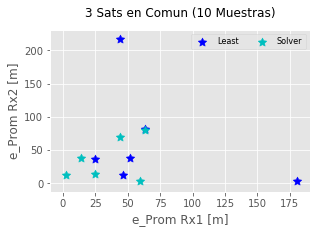


Método Least		Método Solver	
e_Rx1	e_Rx2 	 e_Rx1	e_Rx2	
68.457	65.014 	34.577	36.256 	 
porcentaje aciertos  0.9


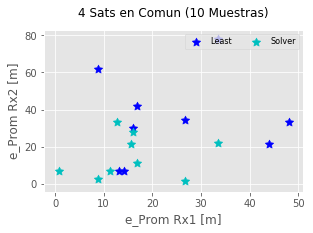


Método Least		Método Solver	
e_Rx1	e_Rx2 	 e_Rx1	e_Rx2	
24.591	35.038 	15.849	14.925 	 


In [17]:
Muestras = 10
SatsinCommon = [3, 4]
bias_noise = 1e-12


# Generando Gráficos
leyenda = [str(i)+" Sats" for i in SatsinCommon]
#print leyenda
axes_titles = ['e_Prom Rx1 [m]', 'e_Prom Rx2 [m]'] 
plot_title = ['e_prom para satelites en comun(%d Muestras)'%(Muestras)]
title = axes_titles + plot_title + leyenda
#print title
avg_Lea, avg_Sol = Error_Pruebas(Muestras, SatsinCommon, bias_noise, title, 0)

### Estimación del error promedio en el posicionamiento.

In [18]:
# Generando Gráficos
leyenda = [str(i) for i in SatsinCommon]
#print leyenda
axes_titles = ['e_Prom Rx1 [m]', 'e_Prom Rx2 [m]'] 
plot_title = ['Error prom para %s sats en comun(%d Muestras)'%(leyenda, Muestras)]
title = axes_titles + plot_title + leyenda

#print leyenda

#Graficar_Prom(avg_Lea, avg_Sol, title)

# plot_file = "e_prom_SatsComun1.png"

# a = Graficar_Prom(avg_Lea, avg_Sol, title, plot_file)
# display(Image(plot_file),Caption(plot_file, 'e_prom_SatsComun1', plot_title[0]))

En la gráfica anterior, se puede apreciar como el error promedio obtenido por el método Solver (cyan), es menor que el obtenido por medio de la ejecución de Least Squares (Azúl Oscuro), para un total de 10 medidas en cada receptor; cuando estos tienen visibilidad común a 3 y 4 satélites.

## Ejecutando Solver para n experimentos (Sin Imprimir información del procesamiento)    

Para el escenario presentado a continuación, se ha considerado la representación de 300 ejecuciones de cada uno de los métodos iterativos (Least Square y Solver).\newline

Se presentan los resultados de 3 escenarios en los cuales los dos receptores tienen visibilidad común a un conjunto de 3, 5 y 7 satélites respectivamente.\newline

porcentaje aciertos  0.86


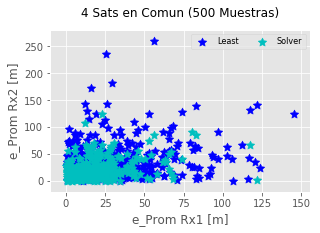


Método Least		Método Solver	
e_Rx1	e_Rx2 	 e_Rx1	e_Rx2	
32.259	36.390 	18.139	20.607 	 
porcentaje aciertos  0.848


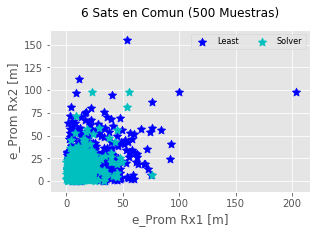


Método Least		Método Solver	
e_Rx1	e_Rx2 	 e_Rx1	e_Rx2	
24.193	24.987 	12.908	14.499 	 
porcentaje aciertos  0.87


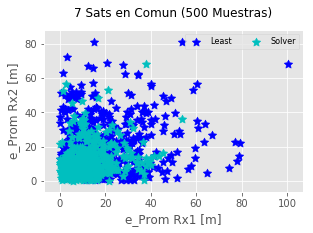


Método Least		Método Solver	
e_Rx1	e_Rx2 	 e_Rx1	e_Rx2	
21.389	22.069 	11.958	12.216 	 


In [19]:
Imprimir_info = 0
Muestras = 500
SatsinCommon = [4, 6, 7]
bias_noise = 1e-12

# Generando Gráficos
leyenda = [str(i)+" Sats" for i in SatsinCommon]
#print leyenda
axes_titles = ['e_Prom Rx1 [m]', 'e_Prom Rx2 [m]'] 
plot_title = ['e_prom para satelites en comun(%d Muestras)'%(Muestras)]
title = axes_titles + plot_title + leyenda
#print title
avg_Lea, avg_Sol = Error_Pruebas(Muestras, SatsinCommon, bias_noise, title, Imprimir_info)

De las figuras anteriores se puede resaltar que:

* El error, producto de estimar la posición en los receptores a través del método solver (color Cyan), es menor y menos disperso que el generado por el método Least Squares (Azúl Oscuro). 

* Al aumentar la disponibilidad de satélites visibles en común de los receptores, el nivel de error en el posicionamiento por cualquiera de los 2 métodos disminuye. Sin embargo, el método Solver sigue presentando menor nivel de error y dispersión que el método Least Squares.

* El porcentaje de aciertos del método solver para cálcular la posición de los receptores, se encuentra en el intervalo de 80$\%$ al 90$\%$, para una totalidad de 500 las muestras (soluciones de posicionamiento en un receptor); es decir que de un conjunto de 10 medidas tomadas por un receptor entre 8 o 9 de ellas, corresponden a valores cercanos a la posición real del receptor.

In [20]:
# Generando Gráficos
leyenda = [str(i) for i in SatsinCommon]
#print leyenda
axes_titles = ['e_Prom Rx1 [m]', 'e_Prom Rx2 [m]'] 
plot_title = ['Error prom para %s sats en comun(%d Muestras)'%(leyenda, Muestras)]
title = axes_titles + plot_title + leyenda

#print leyenda

#Graficar_Prom(avg_Lea, avg_Sol, title)
# plot_file = "e_prom_SatsComun2.png"

# a = Graficar_Prom(avg_Lea, avg_Sol, title, plot_file)
# display(Image(plot_file),Caption(plot_file, 'e_prom_SatsComun2', str(plot_title[0])))

In [21]:
!python -V

Python 3.5.2 :: Anaconda 4.2.0 (64-bit)
